In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
#from sklearn.linear_model import Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import pickle

import warnings
from warnings import filterwarnings
filterwarnings("ignore")

sns.set()

Data collection & Preprocessing

In [2]:
#Loading the data from csv file to a pandas DataFrame
df1 = pd.read_csv('calories.csv')
#Print the first 5 rows of the DataFrame
df1.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
#Loading the data from csv file to a pandas DataFrame
df2 = pd.read_csv('exercise.csv')
#Print the first 5 rows of the DataFrame
df2.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
#combine the two dataframes
df = pd.concat([df2,df1["Calories"]],axis=1)
     

df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [5]:
#getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [6]:
#get some statistical measures about the data
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [7]:
#checking the missing values
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [8]:
df.drop(columns = ["User_ID"],axis=1,inplace =True)
     

df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


Data Analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [10]:
cat_col=[col for col in df.columns if df[col].dtype=='O'] #-->Object-"o"
cat_col

['Gender']

In [11]:
df["Gender"].value_counts()
     

Gender
female    7553
male      7447
Name: count, dtype: int64

Data Visualization

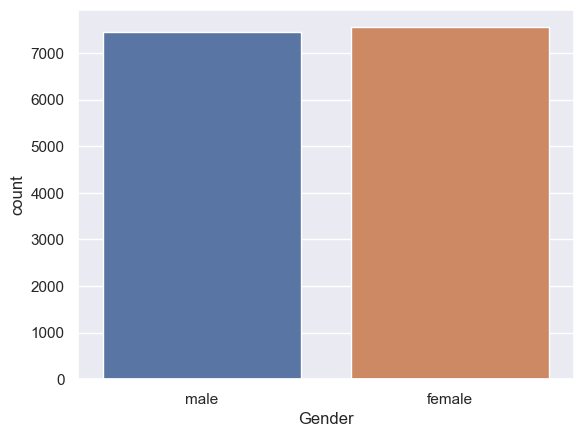

In [12]:
#plotting the gender column in countplot
sns.countplot(df, x='Gender')
plt.show()

In [13]:
pd.get_dummies(df["Gender"],drop_first=True)

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [14]:
categorical = df[cat_col]
categorical.head()
     

,Gender
0,male
1,female
2,male
3,female
4,female


In [15]:
categorical = pd.get_dummies(categorical["Gender"],drop_first=True)
     

categorical

,male
0,True
1,False
2,True
3,False
4,False
...,...
14995,False
14996,False
14997,False
14998,True


In [16]:
Num_col = [col for col in df.columns if df[col].dtype != "O"]
Num_col

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [17]:
df[Num_col].shape

(15000, 7)

In [18]:
Numerical = df[Num_col]
Numerical.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,69,179.0,79.0,5.0,88.0,38.7,26.0
3,34,179.0,71.0,13.0,100.0,40.5,71.0
4,27,154.0,58.0,10.0,81.0,39.8,35.0


In [19]:
Numerical.shape

(15000, 7)

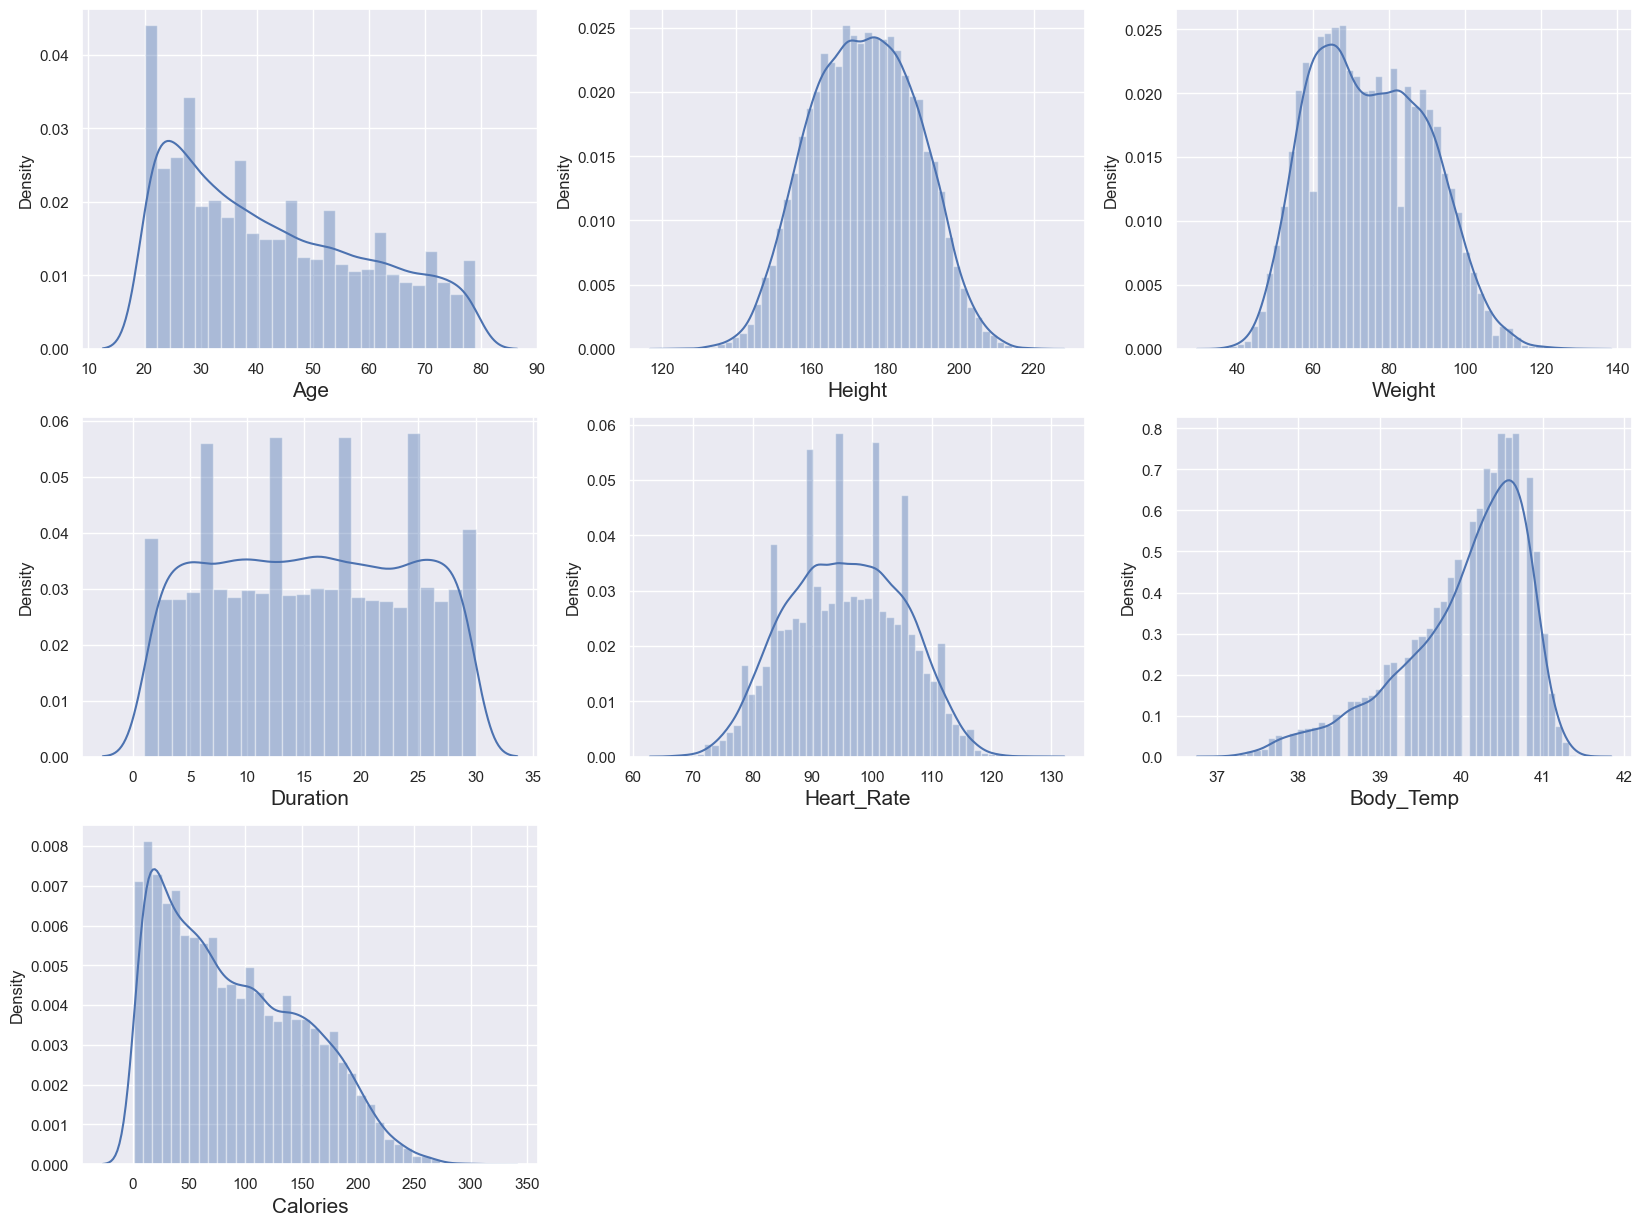

In [20]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in Numerical:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(Numerical[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

<Axes: >

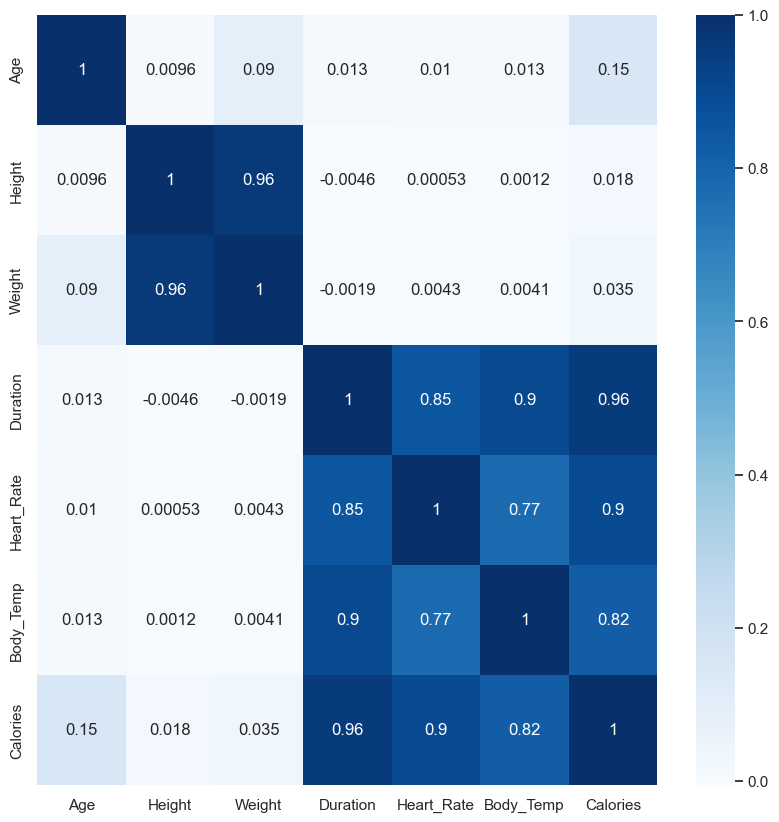

In [21]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(Numerical.corr(), cmap='Blues',annot = True)

In [22]:
data = pd.concat([categorical,Numerical],axis=1)
     

data.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,True,68,190.0,94.0,29.0,105.0,40.8,231.0
1,False,20,166.0,60.0,14.0,94.0,40.3,66.0
2,True,69,179.0,79.0,5.0,88.0,38.7,26.0
3,False,34,179.0,71.0,13.0,100.0,40.5,71.0
4,False,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: >

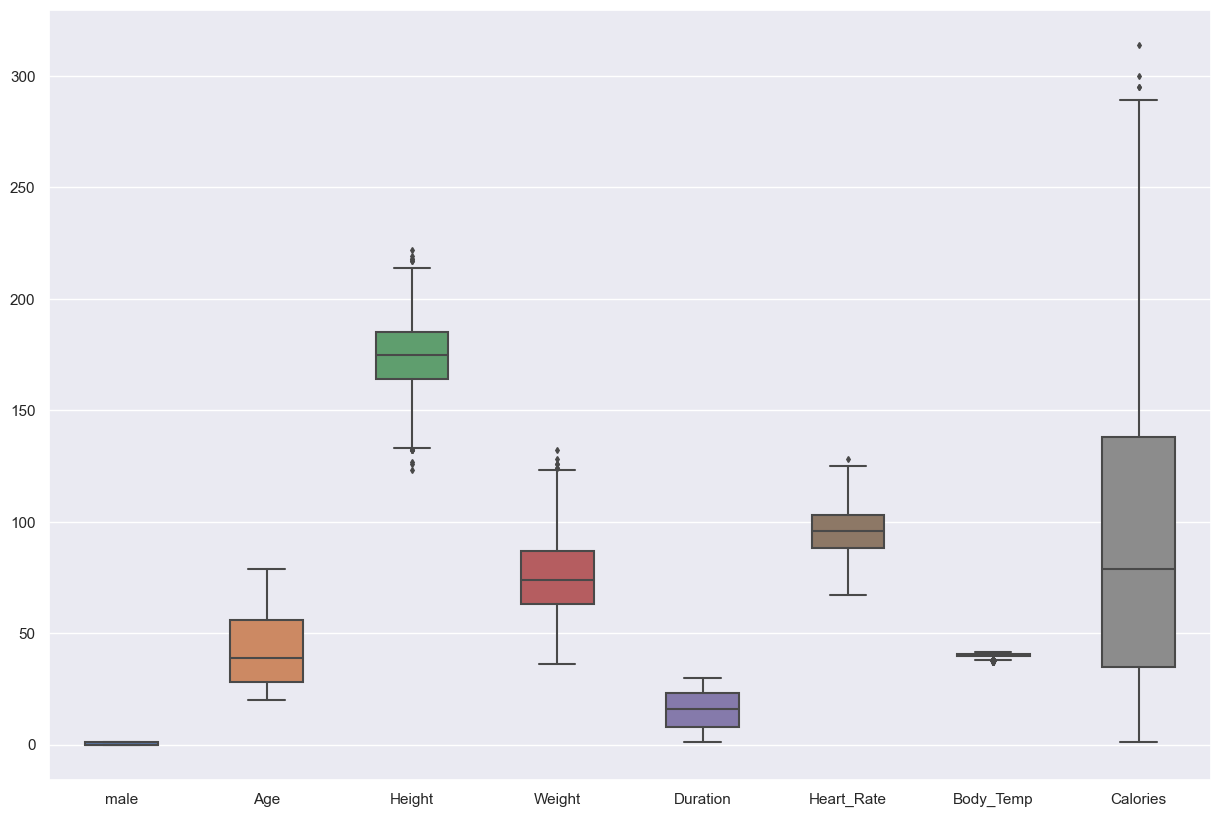

In [23]:
#plotting the total columns in boxplot
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data=data,width = 0.5,fliersize = 3,ax=ax)

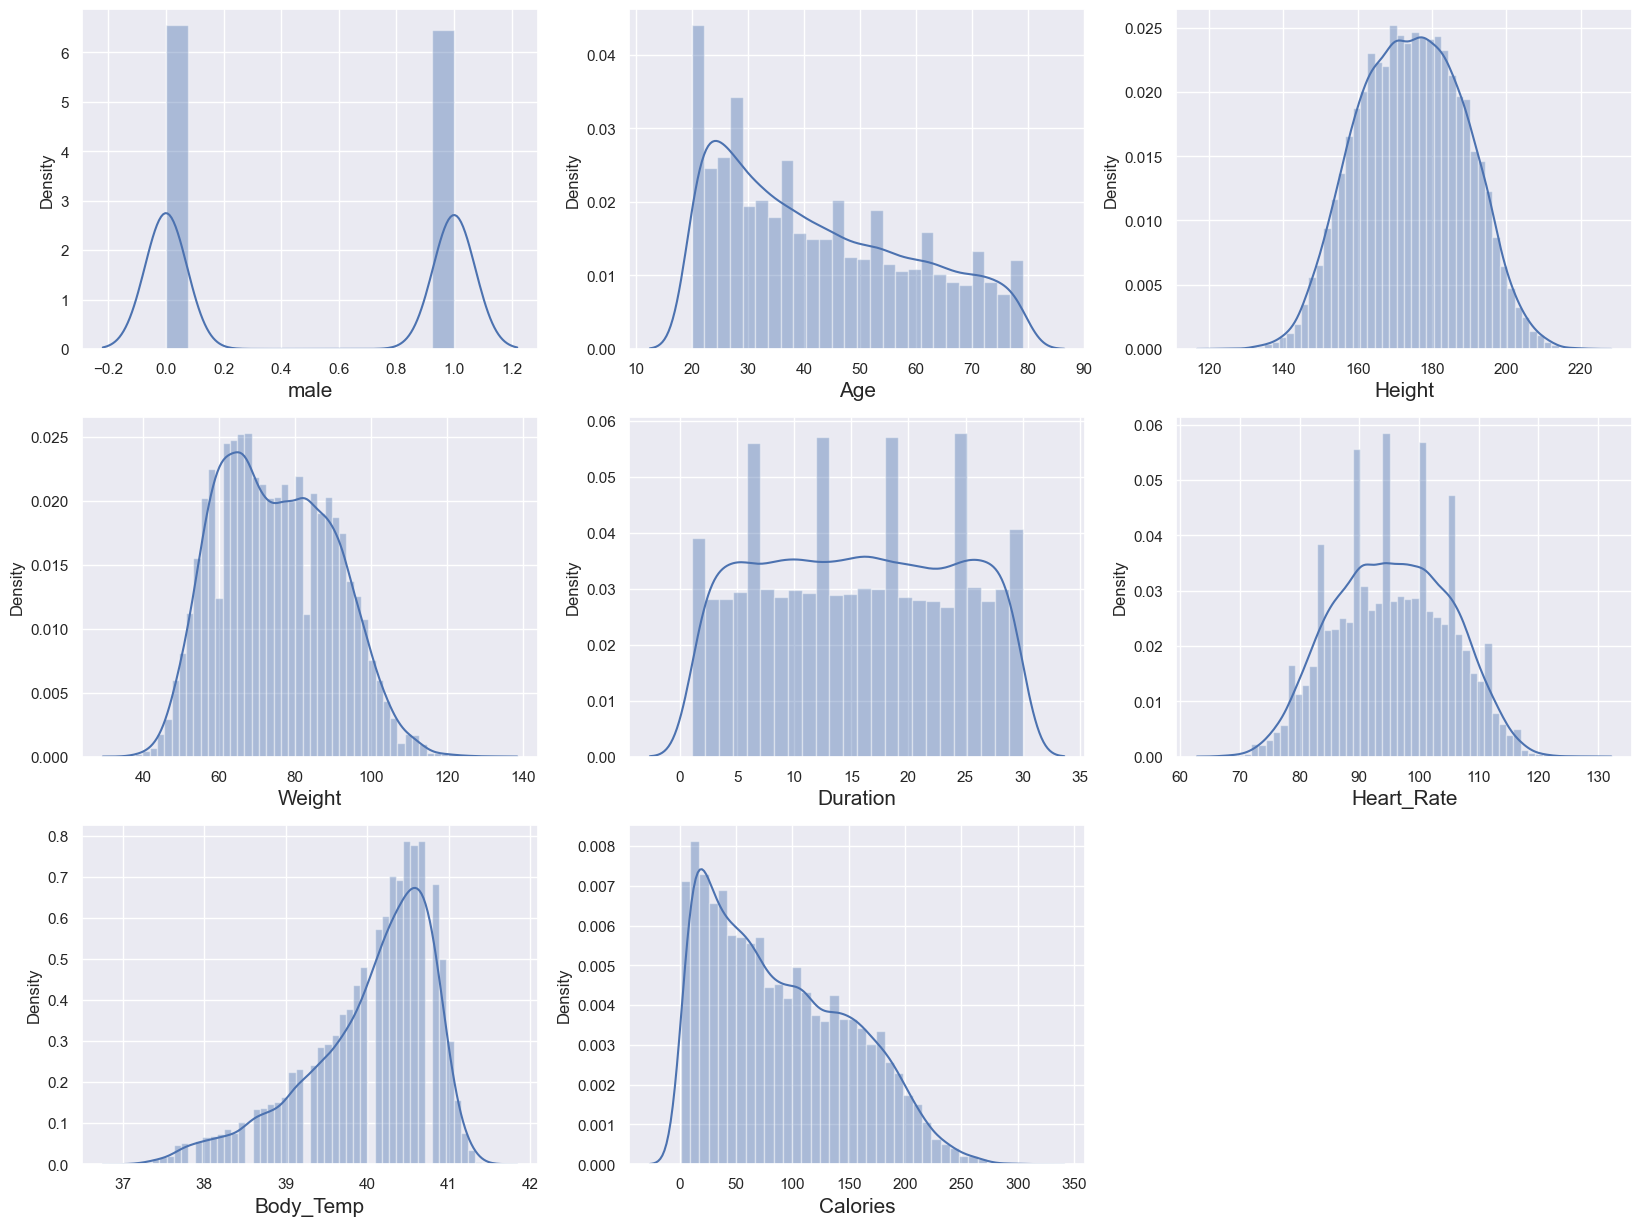

In [24]:
#finding the distrubution of total columns
plt.figure(figsize=(20,15))
plotnumber = 1

for column in data:
  if plotnumber <= 8:
    ax = plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=15)
  plotnumber+=1
plt.show()

In [25]:
data.columns

Index(['male', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [26]:
X = data.drop(columns = ["Calories"],axis = 1)
y = data["Calories"]

In [27]:
X.head()

,male,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,True,68,190.0,94.0,29.0,105.0,40.8
1,False,20,166.0,60.0,14.0,94.0,40.3
2,True,69,179.0,79.0,5.0,88.0,38.7
3,False,34,179.0,71.0,13.0,100.0,40.5
4,False,27,154.0,58.0,10.0,81.0,39.8


In [28]:
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

Splitting the data into train data and test data

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [30]:
print("Shape of X Train: ",X_train.shape)
print("Shape of X Test: ",X_test.shape)
print("Shape of y Train: ",y_train.shape)
print("Shape of y Test: ",y_test.shape)

Shape of X Train:  (12000, 7)
Shape of X Test:  (3000, 7)
Shape of y Train:  (12000,)
Shape of y Test:  (3000,)


In [31]:
#from sklearn import metrics
def predict(ml_model):
    model=ml_model.fit(X_train,y_train)
    print('Score : {}'.format(model.score(X_train,y_train)))
    y_prediction=model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')

    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))

    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    
    sns.distplot(y_test-y_prediction)

MODEL TRAINING :
    XG Boost Regressor

Score : 0.9995380557081355
predictions are: 
 [197.06581   70.867226 196.99498  ...  29.043041 104.09284   14.61472 ]


r2 score: 0.9986863132331905
MAE: 1.5521575984954834
MSE: 5.2744122853837005
RMSE: 2.2966088664340956


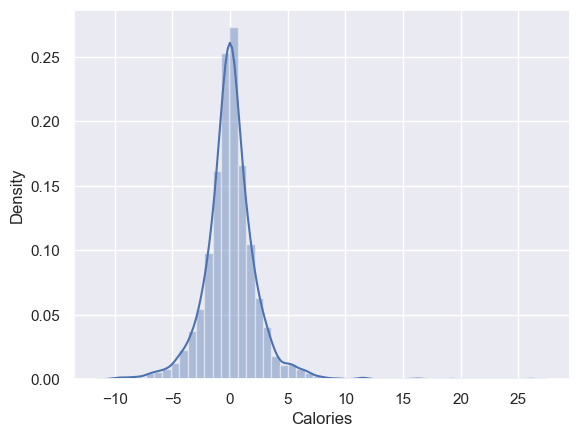

In [32]:
regression = predict(XGBRegressor())
regression

In [33]:
filename = 'finalized_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

Score : 0.967592555473578
predictions are: 
 [198.81182363  80.43555305 194.40940033 ...  22.14745631 118.63504926
 -11.98134672]


r2 score: 0.9655977245826503
MAE: 8.479071745987948
MSE: 138.12408611460916
RMSE: 11.752620393538164


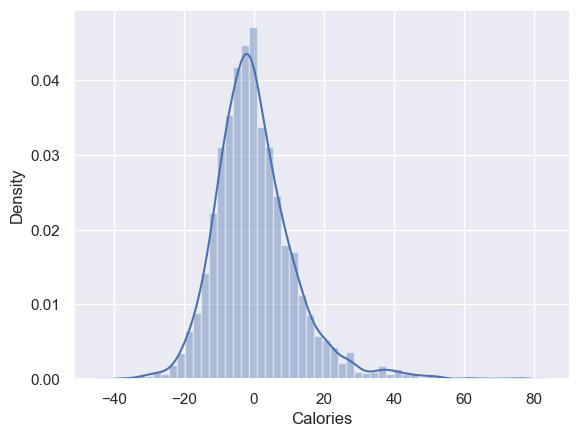

In [34]:
predict(LinearRegression())

Score : 1.0
predictions are: 
 [194.  75. 204. ...  30. 112.  13.]


r2 score: 0.992074825617152
MAE: 3.558666666666667
MSE: 31.819333333333333
RMSE: 5.640862818162956


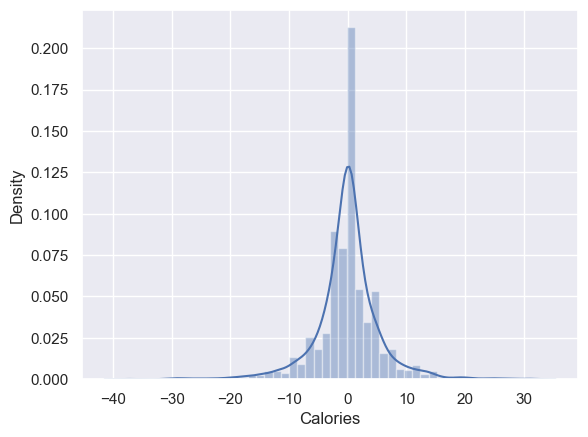

In [35]:
predict(DecisionTreeRegressor())

Score : 0.9996685982712079
predictions are: 
 [197.39  66.   195.78 ...  27.96 110.52  14.29]


r2 score: 0.9976540867466752
MAE: 1.8191866666666665
MSE: 9.418770133333334
RMSE: 3.0690014879979017


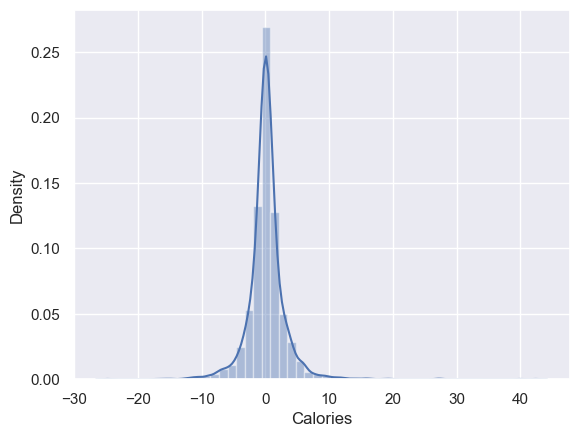

In [36]:
predict(RandomForestRegressor())